In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
field = 'IDARADO2'

## Upload WCA file


In [24]:
df1 = pd.read_csv('/home/dasxgo/developer/rock/WCA_2.csv')
data_major = 'OIL'
data_reservoir = 'WCA'
df1.insert(0, 'FIELD', field) 
df1.insert(1, 'MAJOR', data_major)
df1.insert(2, 'RESERVOIR', data_reservoir)
df1.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-05-01,1,31,369,256,521
1,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-06-01,2,30,9046,7205,13550
2,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-07-01,3,31,8277,9401,12466
3,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-08-01,4,31,8645,10927,13092
4,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-09-01,5,30,7093,10786,10800


## Upload WCB file

In [25]:
df2 = pd.read_csv('/home/dasxgo/developer/rock/WCB_2.csv')
data_major = 'OIL'
data_reservoir = 'WCB'
df2.insert(0, 'FIELD', field) 
df2.insert(1, 'MAJOR', data_major)
df2.insert(2, 'RESERVOIR', data_reservoir)
df2.head()


,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-05-01,1,31,2960,2731,6107
1,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-06-01,2,30,22900,20793,47279
2,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-07-01,3,31,23100,25215,47742
3,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-08-01,4,31,15346,23772,31752
4,IDARADO2,OIL,WCB,42-317-42465,8796,10398,EXXON,DARK STAR UNIT 1 2103BH,2021-09-01,5,30,12285,27857,25446


## Upload LSS file

In [26]:
df3 = pd.read_csv('/home/dasxgo/developer/rock/LSS_2.csv')
data_major = 'OIL'
data_reservoir = 'LSS'
df3.insert(0, 'FIELD', field) 
df3.insert(1, 'MAJOR', data_major)
df3.insert(2, 'RESERVOIR', data_reservoir)
df3.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-06-01,1,30,31329,8505,75909
1,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-07-01,2,31,22055,18004,53596
2,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-08-01,3,31,18680,11996,45531
3,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-09-01,4,30,17455,9466,42671
4,IDARADO2,OIL,LSS,42-317-43640,8274,10425,EXXON,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2022-10-01,5,31,26144,16693,64099


## **Flatflie**

In [27]:
df = pd.concat([df1,df2,df3], ignore_index=True)
df['ProducingMonth'] = pd.to_datetime(df['ProducingMonth'])
df.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL
0,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-05-01,1,31,369,256,521
1,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-06-01,2,30,9046,7205,13550
2,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-07-01,3,31,8277,9401,12466
3,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-08-01,4,31,8645,10927,13092
4,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-09-01,5,30,7093,10786,10800


## Data according to plan



In [28]:
def calculate_production_values(df, well_planned):
    production_columns = ['LiquidsProd_BBL', 'GasProd_MCF', 'WaterProd_BBL']
    production_data = {}

    for column in production_columns:
        data = df[column] * (well_planned / df['LateralLength_FT']) * (30.4 / df['ProducingDays'])
        production_data[column] = data

    df[['OIL_BBL', 'GAS_MCF', 'WATER_BBL']] = pd.DataFrame(production_data)

    # Convert columns to int64
    for column in production_columns:
        df[['OIL_BBL', 'GAS_MCF', 'WATER_BBL']] = np.array(df[['OIL_BBL', 'GAS_MCF', 'WATER_BBL']], np.int64)

    return df

well_planned = 5000
df = calculate_production_values(df, well_planned)
df.head()


/home/dasxgo/mambaforge/envs/rock/lib/python3.11/site-packages/pandas/core/generic.py:2070: RuntimeWarning: invalid value encountered in cast
  return np.asarray(self._values, dtype=dtype)


,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,OIL_BBL,GAS_MCF,WATER_BBL
0,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-05-01,1,31,369,256,521,242,168,342
1,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-06-01,2,30,9046,7205,13550,6152,4900,9215
2,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-07-01,3,31,8277,9401,12466,5447,6187,8204
3,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-08-01,4,31,8645,10927,13092,5689,7191,8616
4,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-09-01,5,30,7093,10786,10800,4823,7335,7344


## Type of Data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FIELD             4810 non-null   object        
 1   MAJOR             4810 non-null   object        
 2   RESERVOIR         4810 non-null   object        
 3   API_UWI           4810 non-null   object        
 4   TVD_FT            4810 non-null   int64         
 5   LateralLength_FT  4810 non-null   int64         
 6   ENVOperator       4810 non-null   object        
 7   WellName          4810 non-null   object        
 8   ProducingMonth    4810 non-null   datetime64[ns]
 9   TotalProdMonths   4810 non-null   int64         
 10  ProducingDays     4810 non-null   int64         
 11  LiquidsProd_BBL   4810 non-null   int64         
 12  GasProd_MCF       4810 non-null   int64         
 13  WaterProd_BBL     4810 non-null   int64         
 14  OIL_BBL           4810 n

## Check errors


In [30]:
## variable = OIL_BBL, GAS_MCF or WATER_BBL

error = 'OIL_BBL'

df[df[error] == 0].count() + df[df[error] < 0].count() 


FIELD               41
MAJOR               41
RESERVOIR           41
API_UWI             41
TVD_FT              41
LateralLength_FT    41
ENVOperator         41
WellName            41
ProducingMonth      41
TotalProdMonths     41
ProducingDays       41
LiquidsProd_BBL     41
GasProd_MCF         41
WaterProd_BBL       41
OIL_BBL             41
GAS_MCF             41
WATER_BBL           41
dtype: int64

## Cleanning Data


In [31]:
cols = ["OIL_BBL", "GAS_MCF", "WATER_BBL"]
for col in cols:
    
    df.drop(df[(df["OIL_BBL"] == 0) | (df["OIL_BBL"] < 0)].index, inplace = True)
    df.drop(df[(df["GAS_MCF"] == 0) | (df["GAS_MCF"] < 0)].index, inplace = True)
    df.drop(df[(df["WATER_BBL"] == 0) | (df["WATER_BBL"] < 0)].index, inplace = True)

## Check cleanning

In [32]:
## variable = OIL_BBL, GAS_MCF or WATER_BBL

data_okay = 'OIL_BBL'

df[df[data_okay ] == 0].count() + df[df[data_okay] < 0].count()

FIELD               0
MAJOR               0
RESERVOIR           0
API_UWI             0
TVD_FT              0
LateralLength_FT    0
ENVOperator         0
WellName            0
ProducingMonth      0
TotalProdMonths     0
ProducingDays       0
LiquidsProd_BBL     0
GasProd_MCF         0
WaterProd_BBL       0
OIL_BBL             0
GAS_MCF             0
WATER_BBL           0
dtype: int64

## **Check Flaflie**

In [33]:
df.head()

,FIELD,MAJOR,RESERVOIR,API_UWI,TVD_FT,LateralLength_FT,ENVOperator,WellName,ProducingMonth,TotalProdMonths,ProducingDays,LiquidsProd_BBL,GasProd_MCF,WaterProd_BBL,OIL_BBL,GAS_MCF,WATER_BBL
0,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-05-01,1,31,369,256,521,242,168,342
1,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-06-01,2,30,9046,7205,13550,6152,4900,9215
2,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-07-01,3,31,8277,9401,12466,5447,6187,8204
3,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-08-01,4,31,8645,10927,13092,5689,7191,8616
4,IDARADO2,OIL,WCA,42-317-40940,8577,7450,"VENCER ENERGY, LLC",MCMURRY-CRIM 50 105HA,2018-09-01,5,30,7093,10786,10800,4823,7335,7344


In [34]:
def select_data_frame(df, reservoir):
    df_reservoir = df[df['RESERVOIR'] == reservoir]
    return df_reservoir[['WellName', 'TotalProdMonths', 'OIL_BBL']]

# funtion for the reservoir
df_lss = select_data_frame(df, "LSS")
df_wsb = select_data_frame(df, "WCB")
df_wca = select_data_frame(df, "WCA")


In [67]:
df_lss

,WellName,TotalProdMonths,OIL_BBL
3184,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,1,15226
3185,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,2,10373
3186,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,3,8785
3187,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,4,8483
3188,STRAIN 19 UNIT 1&2 ALLOC 1933 1923SH,5,12296
...,...,...,...
4805,TEXACO-MCMURRY 3244B 2HL,4,7581
4806,TEXACO-MCMURRY 3244B 2HL,5,6520
4807,DIRE WOLF UNIT 2 0427SH,1,3626
4808,DIRE WOLF UNIT 2 0427SH,2,6844


In [68]:
df_lss.groupby("WellName").count()

,TotalProdMonths,OIL_BBL
WellName,,
CAFFEY-CHIEFTAIN 3229A 1HL,4,4
CAFFEY-CHIEFTAIN 3229C 3HL,4,4
CAFFEY-CHIEFTAIN 3229D 4HL,4,4
DARK STAR UNIT 1 2121SH,19,19
DARK STAR UNIT 1 2123SH,19,19
DARK STAR UNIT 1 2124SH,17,17
DARK STAR UNIT 2 2125SH,18,18
DARK STAR UNIT 2 2127SH,16,16
DARK STAR UNIT 2 2128SH,20,20


In [88]:
maximos = df_lss.groupby('WellName').max().loc[:, ['OIL_BBL']]
maximos


,OIL_BBL
WellName,
CAFFEY-CHIEFTAIN 3229A 1HL,13668
CAFFEY-CHIEFTAIN 3229C 3HL,16988
CAFFEY-CHIEFTAIN 3229D 4HL,16847
DARK STAR UNIT 1 2121SH,15237
DARK STAR UNIT 1 2123SH,12428
DARK STAR UNIT 1 2124SH,9731
DARK STAR UNIT 2 2125SH,14638
DARK STAR UNIT 2 2127SH,13704
DARK STAR UNIT 2 2128SH,18322


In [89]:
maximos.describe()

,OIL_BBL
count,48.000000
mean,13643.270833
std,4648.065311
min,5261.000000
25%,9979.250000
50%,13704.000000
75%,16933.250000
max,23555.000000


In [90]:
maximos.mean()

OIL_BBL    13643.270833
dtype: float64

## Oil Average Curve

/tmp/ipykernel_476/2114213119.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_476/2114213119.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data2, x=x, y=y, hue=None, palette='Greys', color='C0',


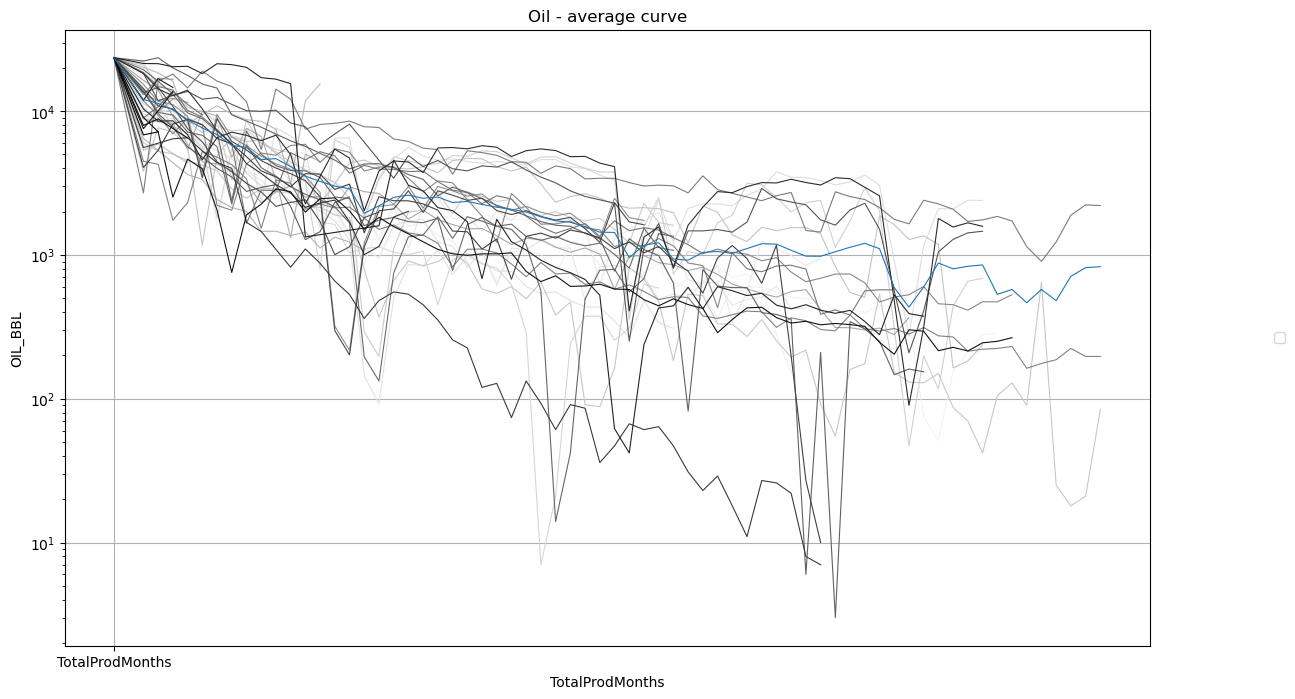

In [21]:
def plot_oil_average_curve(data1, data2, x, y):
    fig, axs = plt.subplots(1, 1, figsize=(14, 8))
    plt.plot(x,y, "b-")
    plt.yscale('log')
    plt.title("Oil - average curve")
    plt.xlabel("TotalProdMonths")
    plt.ylabel("OIL_BBL")
    plt.legend(loc='center', bbox_to_anchor=(1.12,0.5))
    plt.grid(visible=True, which='major', axis='both')

    sns.lineplot(data=data1, x=x, y=y, hue="WellName", palette='Greys', 
    estimator=None, n_boot=1000, lw=0.8, orient='x', sort=True, legend=None, ci='deprecated', ax=None)

    sns.lineplot(data=data2, x=x, y=y, hue=None, palette='Greys', color='C0', 
    estimator=None, n_boot=1000, lw=0.8, orient='x', sort=True, legend=None, ci='deprecated', ax=None)
    
    plt.show() 

# Example of use of the function
data1 = df_lss
data2 = df_mean
x = 'TotalProdMonths'
y = "OIL_BBL"
plot_oil_average_curve(data1, data2, x, y)


